In [ ]:
pip install opencv-python matplotlib numpy

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = 'photo.jpg'
img = cv.imread(img_path)

In [4]:
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
def show(img, title="Image"):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) #Matplotlib uses RGB format
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")

(224, 224, 3)


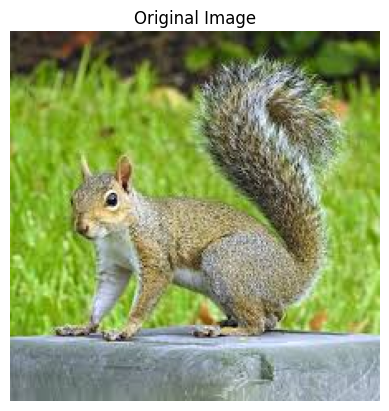

In [6]:
# BGR format
print(img.shape)
show(img, "Original Image")


In [10]:
img[0][0]

array([49, 53, 58], dtype=uint8)

In [ ]:
#slicing and cropping

In [ ]:
gray = cv.imread("photo.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

In [ ]:
cv.imwrite('output.jpg', gray)

In [ ]:
print(img)

In [ ]:
canvas = np.zeros((500, 500, 3), dtype=np.uint8)# np.zeros(shape, dtype) creates an array filled with zeros

In [ ]:
cv.line(canvas, (50, 50), (450, 50), (255, 0, 0), 3)# line(img, pt1, pt2, color, thickness)

In [ ]:
cv.rectangle(canvas, (100, 100), (400, 300), (0, 255, 0), 2)# rectangle(img, pt1, pt2, color, thickness)


In [ ]:
cv.circle(canvas, (250, 250), 60, (0, 0, 255), -1) # circle(img, center, radius, color, thickness)

In [ ]:
cv.putText(canvas, "OpenCV", (150, 450), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)# putText(img, text, org, fontFace, fontScale, color, thickness)
#cv.FONT_HERSHEY_PLAIN, cv.FONT_HERSHEY_DUPLEX, cv.FONT_HERSHEY_COMPLEX, cv.FONT_HERSHEY_TRIPLEX, cv.FONT_HERSHEY_COMPLEX_SMALL, cv.FONT_HERSHEY_SCRIPT_SIMPLEX, cv.FONT_HERSHEY_SCRIPT_COMPLEX 


In [ ]:
show(canvas, "Drawing Shapes")

In [ ]:
img1 = cv.imread("photo.jpg")
img2 = cv.imread("photo1.jpg")

img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))

added = cv.add(img1, img2)
show(added, "Added Image")

In [ ]:
sub = cv.subtract(img1, img2)
show(sub, "Subtracted Image")

In [ ]:
#blend = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
#show(blend, "Blended Image")

In [ ]:
and_img = cv.bitwise_and(img1, img2)
show(and_img, "Bitwise AND")

In [ ]:
or_img = cv.bitwise_or(img1, img2)
show(or_img, "Bitwise OR")

In [ ]:
xor_img = cv.bitwise_xor(img1, img2)
show(xor_img, "Bitwise XOR")

In [ ]:
not_img = cv.bitwise_not(img)
show(not_img, "Bitwise NOT")

In [ ]:
canvas1 = np.zeros((300, 300), dtype="uint8")
canvas2 = np.zeros((300, 300), dtype="uint8")

cv.rectangle(canvas1, (50, 50), (250, 250), 255, -1)
cv.circle(canvas2, (150, 150), 100, 255, -1)

and_img = cv.bitwise_and(canvas1, canvas2)
or_img  = cv.bitwise_or(canvas1, canvas2)
xor_img = cv.bitwise_xor(canvas1, canvas2)
not_img = cv.bitwise_not(canvas1)

plt.figure(figsize=(10,8))

plt.subplot(2,3,1); plt.imshow(canvas1, cmap='gray'); plt.title("Rectangle")
plt.subplot(2,3,2); plt.imshow(canvas2, cmap='gray'); plt.title("Circle")
plt.subplot(2,3,3); plt.imshow(and_img, cmap='gray'); plt.title("AND")
plt.subplot(2,3,4); plt.imshow(or_img, cmap='gray'); plt.title("OR")
plt.subplot(2,3,5); plt.imshow(xor_img, cmap='gray'); plt.title("XOR")
plt.subplot(2,3,6); plt.imshow(not_img, cmap='gray'); plt.title("NOT")

plt.axis("off")
plt.show()

In [ ]:
#Kernels

In [ ]:
resized = cv.resize(img, None, fx=0.5, fy=0.5)
show(resized, "Resized")


In [ ]:
h, w = img.shape[:2]

M = np.float32([
    [1, 0, 100],  # shift right
    [0, 1, 50]    # shift down
])

translated = cv.warpAffine(img, M, (w, h))
show(translated, "Translated")


In [ ]:
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, 45, 1.0)# getRotationMatrix2D(center, angle, scale)

rotated = cv.warpAffine(img, M, (w, h))
show(rotated, "Rotated")


In [ ]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Compute the affine transformation matrix M
# M is a 2×3 matrix that maps pts1 → pts2
# Internally, OpenCV solves linear equations to find this matrix
M = cv.getAffineTransform(pts1, pts2)

# Apply the affine transformation to the image
# warpAffine() moves every pixel according to matrix M
# (w, h) specifies the size of the output image
affine = cv.warpAffine(img, M, (w, h))

show(affine, "Affine Transform")


In [ ]:
pts1 = np.float32([[0,0], [w,0], [0,h], [w,h]]) # Define 4 corner points of the og image
pts2 = np.float32([[50,50], [w-50,30], [30,h-30], [w-30,h-50]]) # Define where those 4 corners should move to

M = cv.getPerspectiveTransform(pts1, pts2)
perspective = cv.warpPerspective(img, M, (w, h))

show(perspective, "Perspective Transform")


In [ ]:
cap = cv.VideoCapture(0)  # 0 = default webcam
#cv.VideoCapture('sample_video_path.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv.imshow("Webcam", frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter(
    'output.mp4',
    fourcc,
    20.0,
    (640, 480)
)

cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    out.write(frame)
    cv.imshow("Recording", frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()